# Mean shift experiments basic

In [4]:
import matplotlib.pyplot as plt
%matplotlib notebook

import warnings
warnings.filterwarnings("ignore")

import numpy as np

from sklearn.datasets import make_blobs

<IPython.core.display.Javascript object>


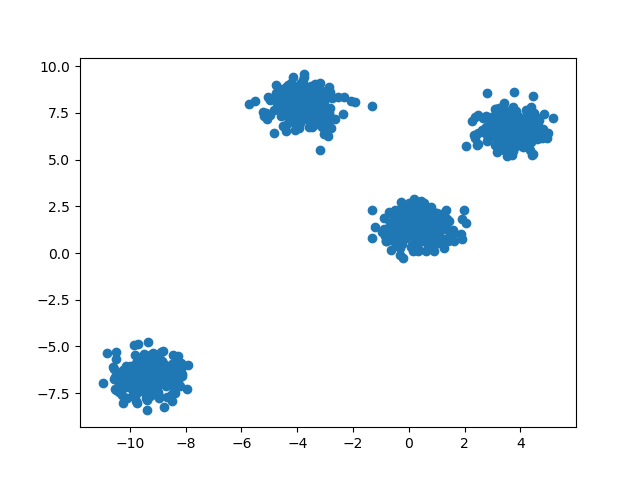

In [17]:
X, y = make_blobs(n_samples = 1000, n_features = 2, centers = 4, cluster_std = 0.6, random_state=101)

plt.figure()
plt.scatter(X[:,0], X[:,1])
plt.show()

In [41]:
nDims = 2
h = 2
minVal = 0
maxVal = 6

finalPoints = np.zeros((X.shape[0], nDims))

In [42]:
import random
from scipy.spatial import distance

for pos, point in enumerate(X):
    point = point.reshape(1, -1)
    #print(point)
    
    notconvergence = True

    prePoint = 0
    while(notconvergence):
        #point = np.random.uniform(low=minVal, high=maxVal, size=(1,nDims))
        #print(point)

        dist = distance.cdist(X, point, 'euclidean')
        insideWindow = np.where(dist < h, X, 0)
        b = insideWindow.shape[0]
        insideWindow = insideWindow[insideWindow != 0]
        inS = (int)(insideWindow.shape[0] / nDims)
        insideWindow = insideWindow.reshape(inS, nDims)
        #print(insideWindow)

        pointsMean = np.mean(insideWindow, axis=0)
        if len(pointsMean.shape) == 1:
            pointsMean = pointsMean.reshape(1, -1)

        point = pointsMean

        if (prePoint == point).all():
            notconvergence = False
        else:
            prePoint = point
        
    finalPoints[pos] = point

In [43]:
finalPoints.shape

(1000, 2)

In [44]:
clusterColors = {}
colores = []
cm = list(map(str, finalPoints))

for c in cm:
    if c in clusterColors:
        colores.append(clusterColors[c])
    else:
        newColor = f"#{random.randrange(0x1000000):06x}"
        clusterColors[c] = newColor
        colores.append(clusterColors[c])
        
print(clusterColors)

{'[0.33204823 1.42854031]': '#6fb9da', '[-9.34646558 -6.62114128]': '#e18862', '[-3.83062716  7.9461864 ]': '#2601fc', '[3.72386044 6.66052976]': '#ac32b2'}


## Points and cluster centroids:

<IPython.core.display.Javascript object>


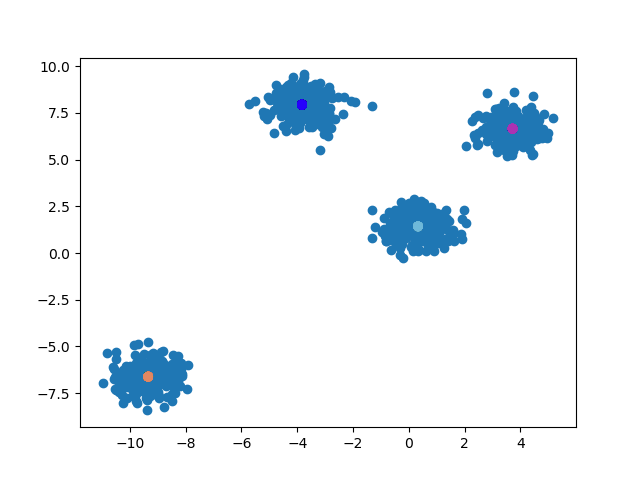

In [45]:
finalPoints = np.asarray(finalPoints)

plt.figure()
plt.scatter(X[:,0], X[:,1])
plt.scatter(finalPoints[:, 0], finalPoints[:, 1], c=colores)
plt.show()

## Cluster assignation:

In [48]:
print("Number of clusters generated: " + str(len(clusterColors)))

Number of clusters generated: 4


<IPython.core.display.Javascript object>


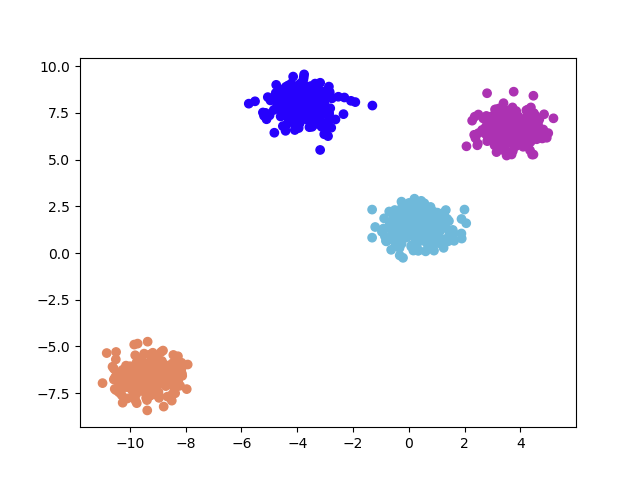

In [46]:
plt.figure()
plt.scatter(X[:,0], X[:,1], c=colores)
plt.show()